# Decision Tree Worksheet


In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
!apt-get install -q graphviz
import graphviz
import matplotlib.pyplot as plt

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  fontconfig libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3 libgraphite2-3
  libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4 libpixman-1-0
  libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0 libxcb-shm0
  libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgraphite2-3 libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 28 newly installed, 0 to remove and 7 not upgraded.
Need to get 4,122 kB of archives.
After this operation, 20.6 MB of addi

Selecting previously unselected package libcairo2:amd64.
Preparing to unpack .../11-libcairo2_1.14.10-1ubuntu1_amd64.deb ...
Unpacking libcairo2:amd64 (1.14.10-1ubuntu1) ...
Selecting previously unselected package libltdl7:amd64.
Preparing to unpack .../12-libltdl7_2.4.6-2_amd64.deb ...
Unpacking libltdl7:amd64 (2.4.6-2) ...
Selecting previously unselected package libthai-data.
Preparing to unpack .../13-libthai-data_0.1.26-3_all.deb ...
Unpacking libthai-data (0.1.26-3) ...
Selecting previously unselected package libdatrie1:amd64.
Preparing to unpack .../14-libdatrie1_0.2.10-5_amd64.deb ...
Unpacking libdatrie1:amd64 (0.2.10-5) ...
Selecting previously unselected package libthai0:amd64.
Preparing to unpack .../15-libthai0_0.1.26-3_amd64.deb ...
Unpacking libthai0:amd64 (0.1.26-3) ...
Selecting previously unselected package libpango-1.0-0:amd64.
Preparing to unpack .../16-libpango-1.0-0_1.40.12-1_amd64.deb ...
Unpacking libpango-1.0-0:amd64 (1.40.12-1) ...
Selecting previously unselect

#### Load pima indians diabetes dataset below

In [6]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima = pd.read_csv(url)
pima.columns = names
pima.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


#### create training and testing dataset with sklearn function: train_test_split

In [7]:
X = pima.loc[:,"preg":"age"]
y = pima.loc[:,"class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Create a model with sklearn's DecisionTreeClassifier and predict values on your test set

In [36]:
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=0, max_depth=7, min_samples_leaf=1)
clf_gini.fit(X_train, y_train)

clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=5, min_samples_leaf=3)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

#### Print the accuracy on the test data, play with the parameters and try to improve the accuracy
hint: there is an sklearn to calculate accuracy

In [37]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

acc_gini = accuracy_score(y_test, y_pred_gini)
acc_entropy = accuracy_score(y_test, y_pred_entropy)

print(str(acc_gini) + " " + str(acc_entropy))

0.7552083333333334 0.7239583333333334


#### Use graphviz to view the decision tree graph
##### hint: want to look at a code example, see the Classification Evaluation notebook on github

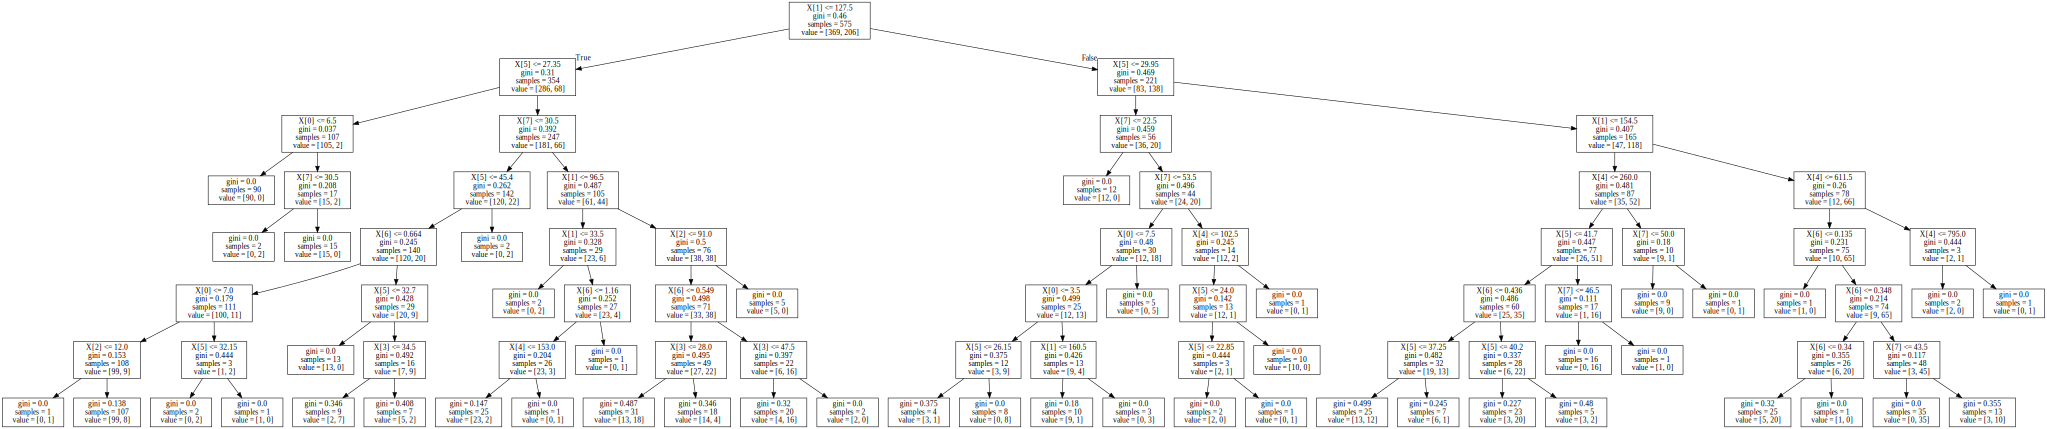

In [46]:
graph1 = graphviz.Source(tree.export_graphviz(clf_gini, out_file=None))
graph1

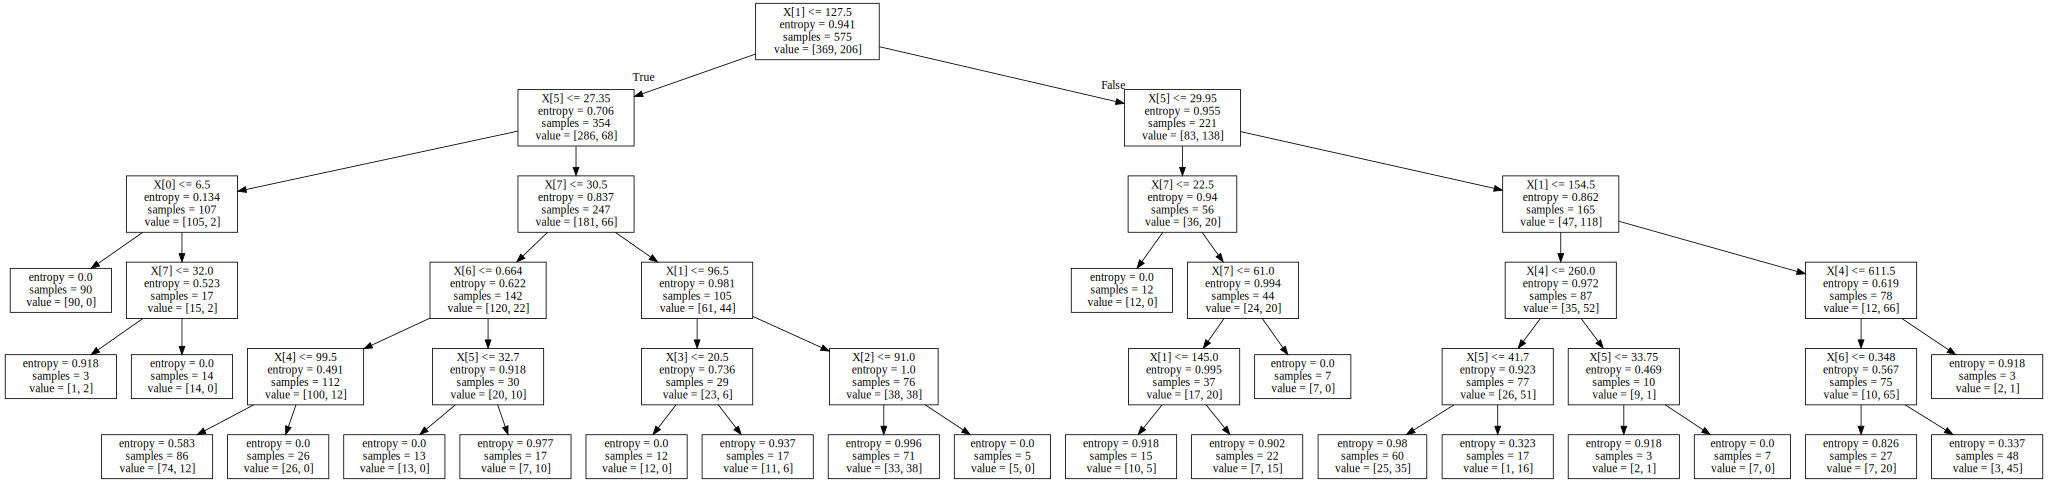

In [47]:
graph2 = graphviz.Source(tree.export_graphviz(clf_entropy, out_file=None))
graph2

#### Use the graph above to answer the questions below

Question 1: If you add up the samples from the leaf nodes, how many samples are there?

In [49]:
X_train.shape

(575, 8)

Question 2: What do you think X[n] represents in the nodes from the graph? <br>

In [55]:
#represents nth column

Question 3: What is the root feature? Does it make sense as the root feature?

In [56]:
#whether or not they had a certain amount of plas concentration

#### If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

In [57]:
#the training accuracy would get to 100% accuracy because of overfitting

#### Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and test data <br>
you only need to predict part of the training data

In [63]:
clf_temp1 = DecisionTreeClassifier(criterion="gini", random_state=0, max_depth=500, min_samples_leaf=1)
clf_temp1.fit(X_train, y_train)
y_pred_temp1 = clf_temp1.predict(X_train)

acc_temp1 = accuracy_score(y_pred_temp1, y_train)
acc_temp1

1.0

In [65]:
clf_temp2 = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=500, min_samples_leaf=1)
clf_temp2.fit(X_train, y_train)
y_pred_temp2 = clf_temp2.predict(X_train)

acc_temp2 = accuracy_score(y_pred_temp2, y_train)
acc_temp2

1.0

# Random Forest

#### Create a model with sklearn's RandomForestClassifier and predict values on your test set

In [90]:
rf = RandomForestClassifier(n_estimators=9, criterion="gini", max_depth=5, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy_score(y_pred_rf, y_test)

0.7760416666666666

#### Print the accuracy on the test data, play with the parameters and try to improve the accuracy<br>
how did the accuracy compare to the decision tree's accuracy?<br>

In [91]:
rf2 = RandomForestClassifier(n_estimators=10, criterion="entropy", max_depth=5, random_state=0)
rf2.fit(X_train, y_train)
y_pred_rf2 = rf2.predict(X_test)

accuracy_score(y_pred_rf2, y_test)

0.8125

#### Print the 3 most important features<br>
hint: sklearn has an attribute to help you find these 

In [93]:
print(rf.feature_importances_)
print()
print(rf2.feature_importances_)

[0.08660718 0.230026   0.0666834  0.04884051 0.07684446 0.20202394
 0.11332787 0.17564664]

[0.08156208 0.24891985 0.04936366 0.07374095 0.05879288 0.1994006
 0.10903626 0.17918373]


#### Find the accuracy for random forests with 1 to 100 trees, counting by 5. Plot these accuracies

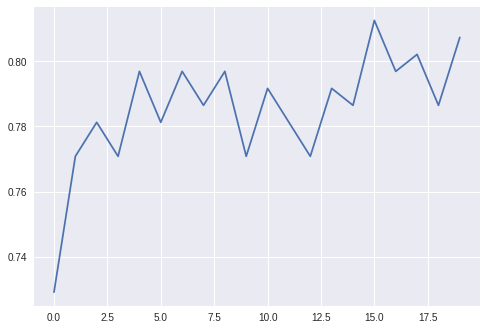

In [97]:
accuracies = []

for i in range(1, 100, 5):
  rfc = RandomForestClassifier(n_estimators=i)
  rfc.fit(X_train, y_train)
  temp = rfc.predict(X_test)
  acc = accuracy_score(temp, y_test)
  accuracies.append(acc)

plt.plot(accuracies)

#### Plot the roc_curve using predict_proba a function for our random forest model, and metrics. roc_curve <br>
It might help to google these functions and look at sklearn's documentation

In [0]:
# your code here

#### To view the trees in the random_forest you can loop through your model's '.estimators_" attribute <br>
If you have time look at pictures of the trees

In [0]:
# your code here